# Explorative Datenanalyse

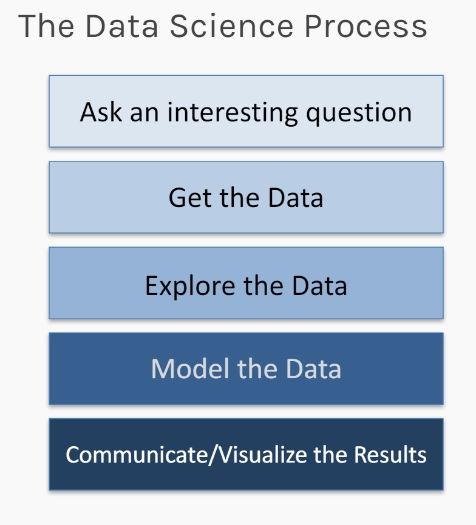

Quelle: Protopapas, Rader, Tanner, CS109 Data Science, 2020 [Link](https://github.com/Harvard-IACS/2020-CS109A/blob/master/content/lectures/lecture01/slides/Lecture1_Introduction.pdf)

Wir verfolgen wieder den Data Science Workflow, fokussieren in diesem Notebook aber auf den 3. Schritt, **Explore the Data**.

Als Datensatz nehmen wir einen Auszug der Top 1000 Filme aus der Internet Movie Database.

## Schritt 1: Ask an interesting question

## Schritt 2: Get the Data

In [1]:
import pandas as pd   # Importieren Standard-Library für das Bearbeiten und Laden von Daten ("Data Engineering").
import matplotlib.pyplot as plt # Standard-Library für das Plotten von Graphen.
import seaborn as sns   # verschönert Matplotlib-Graphiken
import numpy as np # Standard-Library für Rechnen

In [2]:
url_webpage = 'https://raw.githubusercontent.com/thechaudharysab/imdb-data-pandas-visualization/master/data/imdb_1000.csv' # wir speichern den Pfad für die Datei in der Variable url_webpage
IMDB_df = pd.read_csv(url_webpage, sep=',') # einzelnen Einträge in CSV sind durch , getrennt. Oft werden diese aber auch per ; getrennt

In [3]:
# Geben Sie den Namen des Dataframes an und führen Sie die Zelle aus. Damit sehen Sie, ob das Einlesen funktioniert hat
IMDB_df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


## Schritt 3: Explore the data

Wir schauen uns das Dataset genauer an.
Wir werden in diesem Abschnitt folgendes machen:
* deskriptive Analytics. Wie ist die Datei aufgebaut? Was steht da drinnen?
* nach Nullwerte schauen und ggf. ersetzen
* Entdecken von Ausreißern oder Anomalien
* Entdecken von Mustern


In [4]:
IMDB_df.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

Wir schauen uns die Datentypen an, damit wir wissen, welche Variablen wir haben. Plots können wir für folgende Typen durchführen:
* float64 = Reelle Zahlen
* int64 = Ganzzahlen
* Categorical

In [5]:
# Schauen Sie sich die ersten 10 Zeilen des Dataframes an 
IMDB_df.head(10)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


Fangen wir mit der deskriptiven Analyse an. Ein guter Einstieg ist der Befehl describe von Pandas. Wir lernen später noch eine bessere Methode kennen, die vieles für uns abdeckt (Pandas Profiling).

In [7]:
# Verwenden Sie die Methode describe mit Parameter include='all auf Ihr Dataframe
IMDB_df.describe(include='all')

,star_rating,title,content_rating,genre,duration,actors_list
count,979.000000,979,976,979,979.000000,979
unique,NaN,975,12,16,NaN,969
top,NaN,Dracula,R,Drama,NaN,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,NaN,2,460,278,NaN,6
mean,7.889785,NaN,NaN,NaN,120.979571,NaN
std,0.336069,NaN,NaN,NaN,26.218010,NaN
min,7.400000,NaN,NaN,NaN,64.000000,NaN
25%,7.600000,NaN,NaN,NaN,102.000000,NaN
50%,7.800000,NaN,NaN,NaN,117.000000,NaN
75%,8.100000,NaN,NaN,NaN,134.000000,NaN


Wir können hier schon einige deskriptive Sachen ableiten:
* **Zeile Count**: wir haben in allen Spalten bis auf Content_rating 979 Werte, d.h. bei content_rating fehlen 3 Werte oder die Filme sind nicht bewertet
* **Zeile unique**: Es gibt 12 verschiedene ratings und 16 verschiedene Genres. 975 von 979 Titeln eindeutig, d.h. 4 Filme mit gleichem Namen.
* **Zeile Top**: was die häufigsten Werte sind in einer Spalte mit mehreren gleichen Einträgen, z.B. Dracula bei title oder R bei rating.
* **Zeile Frequency**: wie häufig der top Eintrag vorkommt, bspw. 460 mal R rating
* **Zeile mean**: Mittelwert, z.B. 7,8 beim Star Rating
* **Zeile Std**: Standardabweichung, d.h. durchschnittliche Breite der Streuung einzelner Werte um den Mittelwert herum.
* **Zeile min**: geringster Wert, bspw. 7,4 für Star rating
* **Zeile max**: höchster Wert, bspw. 9,3 für Star rating
* **Zeile 50%**: dieser auch Median genannte Wert, der genau in der Mitte der Daten liegt, d.h. er teilt die Daten der Spalte in 2 genau gleich große Untermengen (Beispiel: für die Menge 1, 3, 4, 10, 15, 20, 40 ist 10 der Median, da links und rechts jeweils 3 Elemente sind). Bei einer Menge mit einer geraden Anzahl werden die "beiden Mitten" durch 2 geteilt und dieser Wert als Median genommen.
* **Zeile 25%**, das untere Quantil. Teilt die untere Teilmenge kleiner 50% wiederum in 2 gleich große Mengen. Wir erhalten die Zahl, die die untere Teilmenge geteilt hat. Diese Zahl ist somit größer als 25% der Daten (Beispiel: aus der oberen Menge erhalten wir 1, 3, 4. Somit ist 3 der Median der unteren Menge und dadurch das 25% Quantil der gesamten Menge).
* **Zeile 75%**, das obere Quantil. Teilt die obere Teilmenge wiederum in 2 gleich große Mengen. Wir erhalten einen Wert, der größer ist als 75% der Werte.

Wir verwenden zum Plotten die Libraries [Matplotlib](https://matplotlib.org/) sowie [Seaborn](https://seaborn.pydata.org/index.html), eine graphische Verschönerung von Matplotlib. 

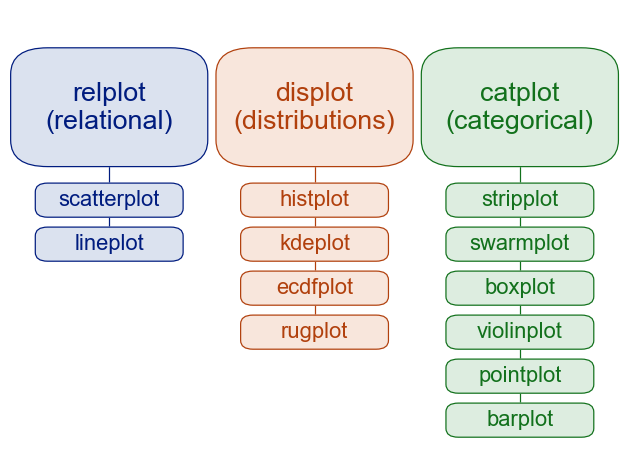

Quelle: [Link](https://seaborn.pydata.org/tutorial/function_overview.html)

Das Bild zeigt die 3 verschiedenen Kategorien von Plots:
* Relational: Zusammenhang bzw. Beziehung zwischen verschiedenen Variablen (Zahlenwerte)
* Distribution: welche Werte ein Features annehmen kann (Zahlenwerte)
* Categorical: Plots für kategorische Werte. Kategorische Variablen sind Variablen, die nur einen Wert aus einer definierten Menge haben können (bspw. Farben: rot, grün, ...)

Welche Werte werden geplottet? 
* Zahlen (Ganzzahlen, reelle Zahlen)
* Kategorische Variablen

Bevor wir mit dem Plotten anfangen, setzen wir noch eine Standardeinstellung, die Größe von Plots, ein.

In [8]:
plt.figure(figsize=(16, 6)) #change size of plots

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

### Relational Plots

#### Lineplot

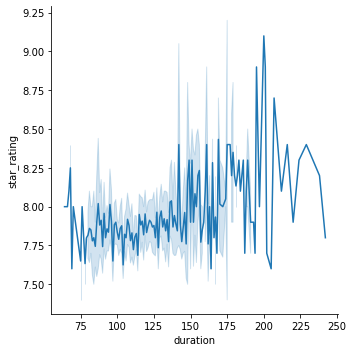

In [11]:
ax = sns.relplot(y="star_rating", x="duration", kind="line", data=IMDB_df)

Diese Darstellung sagt uns nicht viel, deshalb schauen wir uns den Scatterplot an.

#### Scatterplot

Scatterplots eignen sich für Untersuchungen zwischen Zahlen, bspw. star rating vs. duration.

Die Doku für Scatterplot finden wir [hier](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) folgendes:
seaborn.scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)

sowie diesen Auszug der Detaillierung:

Parameters
x, y : vectors or keys in data Variables that specify positions on the x and y axes.

hue: vector or key in data Grouping variable that will produce points with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.

data: pandas.DataFrame, numpy.ndarray, mapping, or sequence Input data structure. Either a long-form collection of vectors that can be assigned to named variables or a wide-form dataset that will be internally reshaped.

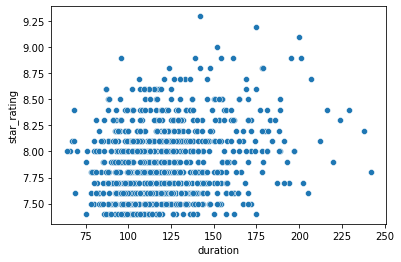

In [13]:
ax = sns.scatterplot(y="star_rating", x="duration", data=IMDB_df)

### Verteilungen

#### Histogram

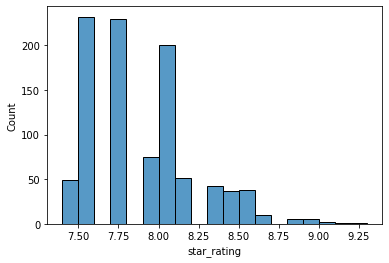

In [14]:
ax = sns.histplot(x="star_rating", data= IMDB_df)

Was sagt Ihnen diese Auswertung?

Wir versehen unsere Plots jetzt mit mehr Informationsgehalt, indem wir einen Titel hinzufügen.
Zusätzlich wollen wir uns nicht die Anzahl, sondern den prozentualen Anteil zeigen lassen. Dazu versehen wir den Plot mit dem Parameter stat="percent".

Probieren Sie auch aus, wie es ohne diesen Parameter aussieht.

[Text(0, 0, '0.0'),
 Text(0, 0, '50.0'),
 Text(0, 0, '100.0'),
 Text(0, 0, '150.0'),
 Text(0, 0, '200.0'),
 Text(0, 0, '250.0')]

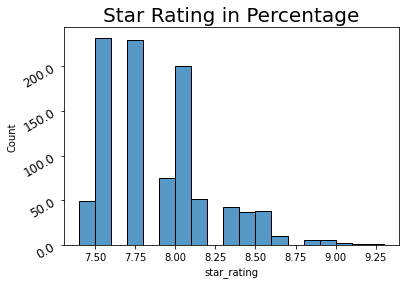

In [16]:
# Histogramm über Star rating und Visualisierung mit Prozent.
ax = sns.histplot(x="star_rating", data= IMDB_df, stat="percent")
# füge einen Titel hinzu mit Schriftgröße 20.
ax.axes.set_title("Star Rating in Percentage", fontsize=20)
# Style: wir drehen die Y-Labels um 30°.
ax.set_yticklabels(ax.get_yticks(), size = 12, rotation=30)

Was sagt Ihnen diese Auswertung?

Nun sind Sie dran: probieren Sie die in der Vorlesung vorgestellten Plots aus und diskutieren Sie die Ergebnisse!

Beispiele für Auswertungen:
* Was ist die häufigste Länge eines Filmes? (Histogram/ KDEPlot: duration)
* Was ist das häufigste Rating eines Filmes? (Histogram/ KDEPlot: star_rating)
* Gibt es einen Zusammenhang zwischen Filmlänge und Rating? (Violinplot/ Scatterplot: x = star_rating und y = duration)
* Gibt es einen Zusammenhang zwischen Filmgenre und Rating? (Stripplot/ Boxplot: genre vs. star_rating)
* Welches Genre hat die meisten Filme unter den Top 1000? 
* Gibt es Zusammenhänge zwischen Länge, Rating und Genre? (Violinplot/Scatterplot: star_rating vs. Duration mit hue=content_rating)
* Plotten Sie einen Pairplot. Was kann man für Auffälligkeiten sehen?

* Schauen Sie sich ein beliebiges Genre an, z.B. Crime. Machen Sie die gleichen Auswertungen: Gibt es Unterschiede? ACHTUNG: hierfür müssen Sie das Dataset filtern. Dafür müssen Sie Sie statt data=IMDB_df folgendes einsetzen: data=IMDB_df[IMDB_df['genre']=='Crime‘].
* Rating: Schauen Sie sich ein beliebiges Rating an. Wie heißt der Filter? Was sehen Sie für Erkenntnisse? ACHTUNG: hierfür müssen Sie wie bei der obigen Frage die Menge nach dem gewählten Rating filtern…..

